In [1]:
import pymc as pm
import preliz as pz
import arviz as az 
import matplotlib.pyplot as plt

plt.style.use('bmh')

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


# Generating the Data 

In [2]:
RANDOM_SEED = 99

p_true = 0.05
N = 3000

data = pz.Bernoulli(p_true).rvs(N, random_state=RANDOM_SEED)
print(data)
print(data.sum())

print(f"Observed frequency in Group A: {data.mean()}") 

[0 0 0 ... 0 0 0]
182
Observed frequency in Group A: 0.06066666666666667


Now we build our model. Suppose we have no strong conviction about the prior.

In [3]:
with pm.Model() as model:
    p = pm.Uniform('p', lower=0, upper=1)
    observed = pm.Bernoulli('observed', p=p, observed=data)
    inferenced_data = pm.sample(20000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


Output()

Sampling 4 chains for 1_000 tune and 20_000 draw iterations (4_000 + 80_000 draws total) took 127 seconds.


array([[<Axes: title={'center': 'p'}>, <Axes: title={'center': 'p'}>]],
      dtype=object)

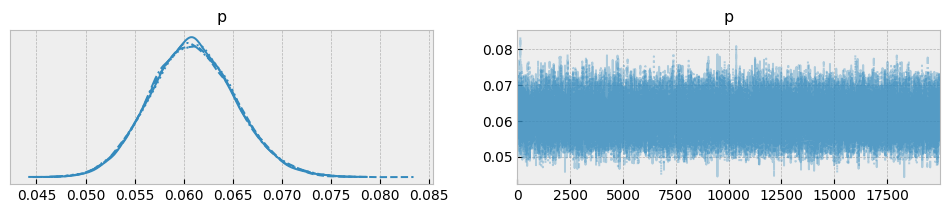

In [4]:
az.plot_trace(inferenced_data)

<Axes: title={'center': 'p'}>

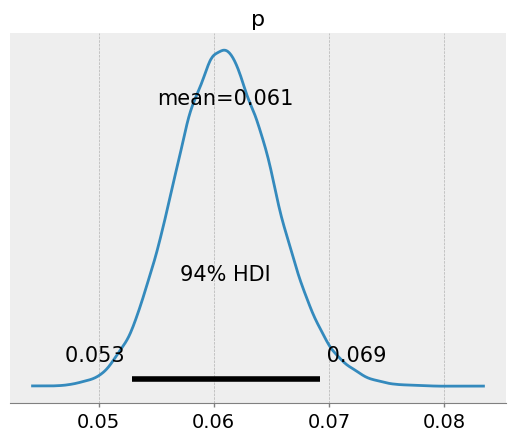

In [5]:
az.plot_posterior(inferenced_data)

# Comparing two observation datasets

## Generating the data

In [6]:
plotting_defaults = dict(
    bins=50,
    kind="hist",
    textsize=10,
)

In [8]:
true_p_A = 0.05
true_p_B = 0.04

N_A =1500
N_B =750

observations_A = pz.Bernoulli(true_p_A).rvs(N_A)
observations_B = pz.Bernoulli(true_p_B).rvs(N_B)

In [ ]:
with pm.Model() as model:
    # uniform priors for the unknown parameters
    p_A = pm.Beta('p_A', alpha=1, beta=1)
    p_B = pm.Beta('p_B', alpha=1, beta=1)

    # likelihoods of observations
    obs_A = pm.Bernoulli('obs_A', p=p_A, observed=observations_A)
    obs_B = pm.Bernoulli('obs_B', p=p_B, observed=observations_B)

    # compute the difference in convertion rates
    delta = pm.Deterministic('delta', p_A - p_B)

    idata = pm.sample(2000)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p_A, p_B]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 19 seconds.


array([[<Axes: title={'center': 'delta'}>,
        <Axes: title={'center': 'delta'}>],
       [<Axes: title={'center': 'p_A'}>, <Axes: title={'center': 'p_A'}>],
       [<Axes: title={'center': 'p_B'}>, <Axes: title={'center': 'p_B'}>]],
      dtype=object)

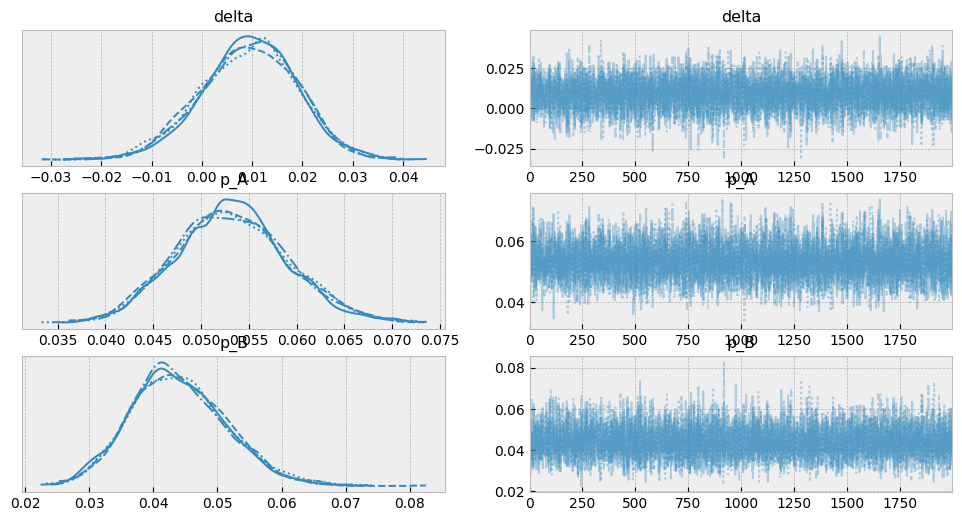

In [ ]:
az.plot_trace(idata)

array([<Axes: title={'center': 'delta'}>, <Axes: title={'center': 'p_A'}>,
       <Axes: title={'center': 'p_B'}>], dtype=object)

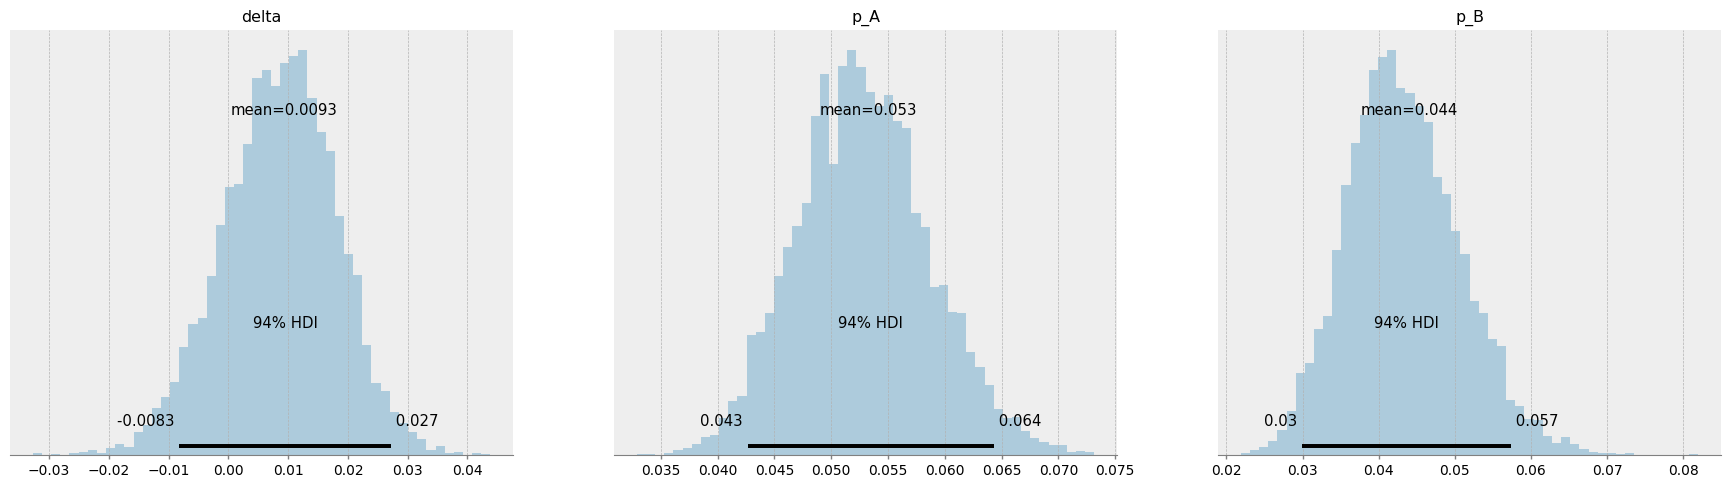

In [ ]:
az.plot_posterior(idata, **plotting_defaults)

In [ ]:
az.summary(idata, kind="stats")

,mean,sd,hdi_3%,hdi_97%
delta,0.009,0.010,-0.008,0.027
p_A,0.053,0.006,0.043,0.064
p_B,0.044,0.007,0.030,0.057
